<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/AEDI_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **TAREFA 4 - REGRESSÃO LINEAR**

### Questão A - Modelagem do preço de venda

100%|██████████| 185k/185k [00:00<00:00, 52.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prevek18/ames-housing-dataset/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   obj

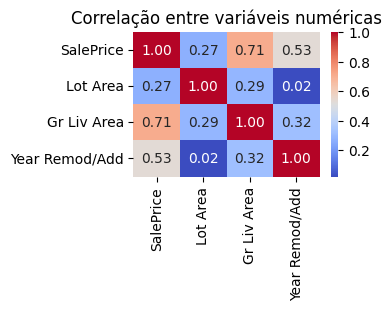

In [1]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Baixar dataset
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")
print("Path to dataset files:", path)

# leitura do arquivo
csv_path = os.path.join(path, "AmesHousing.csv")
df = pd.read_csv(csv_path)

# Análise exploratória: explorar algumas variáveis e como elas se relacionam com o preço de venda.

print(df.info())

# Correlação numérica entre as variáveis

plt.subplot(2, 2, 4)
correlation = df[["SalePrice", "Lot Area", "Gr Liv Area", "Year Remod/Add"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis numéricas")

plt.tight_layout()
plt.show()

A partir da matriz de correlação entre as variáveis, foi constatado que, contrariamente à hipótese de que o preço de venda era altamente impactado pela área do lote, essas variáveis não se mostraram fortemente correlacionadas. Portanto, será levada adiante a análise somente entre o preço de venda e a área construída (Gr Liv Area) e o ano de reforma ou ampliação (Year Remod/Add).

Coeficiente linear (Área construída): 13289.63
Coeficiente angular (Área construída): 111.69

Coeficiente linear (Ano de última reforma/ampliação): -3869250.53
Coeficiente angular (Ano de última reforma/ampliação): 2041.08


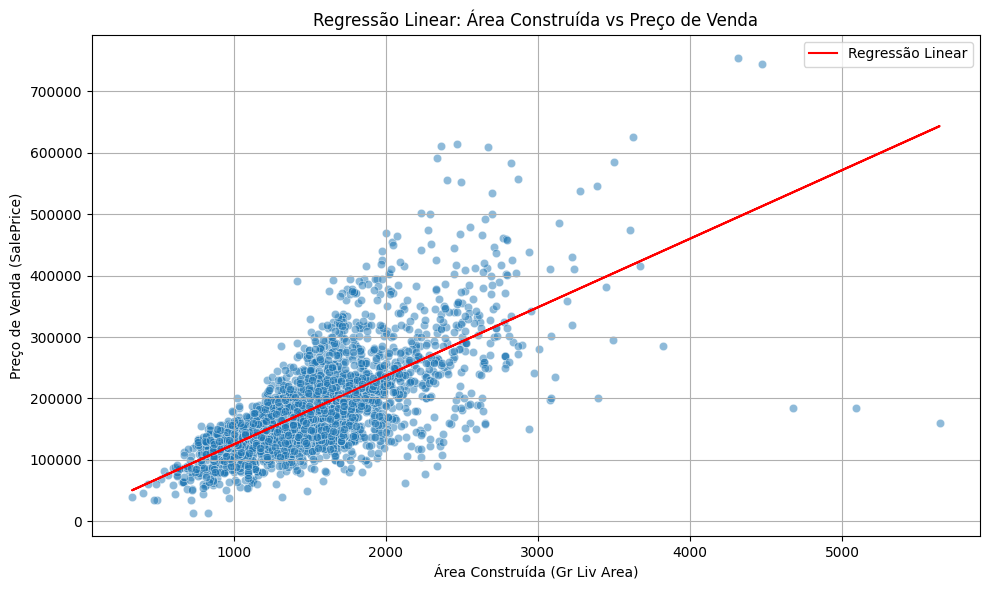

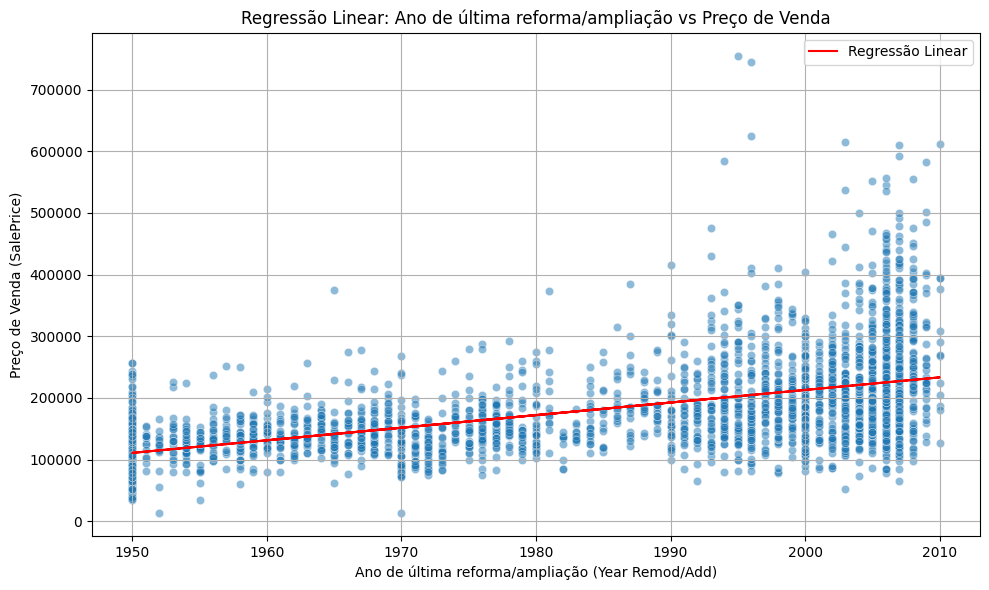

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

# tratamento de dados
# Remover valores nulos
df_clean = df[["Gr Liv Area", "SalePrice"]].dropna()
df_clean2 = df[["Year Remod/Add", "SalePrice"]].dropna()

# Variáveis
X1 = df_clean[["Gr Liv Area"]] #variável explicativa
y1 = df_clean["SalePrice"] # variável dependente

X2 = df_clean2[["Year Remod/Add"]] #variável explicativa

# Modelo de regressão
model1 = LinearRegression()
model1.fit(X1, y1)
y_pred1 = model1.predict(X1)

model2 = LinearRegression()
model2.fit(X2, y1)
y_pred2 = model2.predict(X2)

# Coeficientes
intercept = model1.intercept_
slope = model1.coef_[0]
r2 = model1.score(X1, y1)

intercept2 = model2.intercept_
slope2 = model2.coef_[0]
r22 = model2.score(X2, y1)

print(f"Coeficiente linear (Área construída): {intercept:.2f}")
print(f"Coeficiente angular (Área construída): {slope:.2f}")
print()
print(f"Coeficiente linear (Ano de última reforma/ampliação): {intercept2:.2f}")
print(f"Coeficiente angular (Ano de última reforma/ampliação): {slope2:.2f}")

# Gráfico 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df_clean, alpha=0.5)
plt.plot(X1, y_pred1, color='red', label='Regressão Linear')

plt.title("Regressão Linear: Área Construída vs Preço de Venda")
plt.xlabel("Área Construída (Gr Liv Area)")
plt.ylabel("Preço de Venda (SalePrice)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print()
#gráfico 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Year Remod/Add", y="SalePrice", data=df_clean2, alpha=0.5)
plt.plot(X2, y_pred2, color='red', label='Regressão Linear')

plt.title("Regressão Linear: Ano de última reforma/ampliação vs Preço de Venda")
plt.xlabel("Ano de última reforma/ampliação (Year Remod/Add)")
plt.ylabel("Preço de Venda (SalePrice)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Aparentemente, sob o aspecto visual, o gráfico da regressão linear indica que a variável "ano de última reforma/ampliaçao", apesar de apresentar boa correlação com o preço de venda, não é boa para gerar um modelo de previsão de preço de venda a partir dela, especialmente por ter valores discretos (anos). Para testar isso, será aplicado o coeficiente de determinação, que avalia o quão bem o modelo de regressão consegue prever ou explicar os valores observados para uma dada variável.

In [3]:
from sklearn.linear_model import LinearRegression

print(f"R² da regressão da variável explicativa ano de última reforma/ampliação: {r22:.4f}")

print(f"R² da regressão da variável explicativa área construída: {r2:.4f}")


R² da regressão da variável explicativa ano de última reforma/ampliação: 0.2841
R² da regressão da variável explicativa área construída: 0.4995


O valor do coeficiente de determinação obtido foi significativo R² = 0,2841, o que indica que, apesar de visualmente a regressão apresentar comportamento questionável, a variável é numericamente relevante para a previsão do preço de venda. Portanto, manter-se-á sua utilização. O gráfico abaixo, que compara a média do preço de venda das casas de acordo com o ano de última reforma/ampliaçao apresenta uma melhor visualização da relação entre as duas variáveis. A regressão, quando analisada isoladamente, apresentou um resultado visualmente frágil para mostrar essa relação, tendo sido necessário portanto aprofundar a investigação da variável. Com esse aprofundamento, que se pautou no cálculo do coeficiente de determinação, foi possível afirmar seguramente a relação entre as duas variáveis.

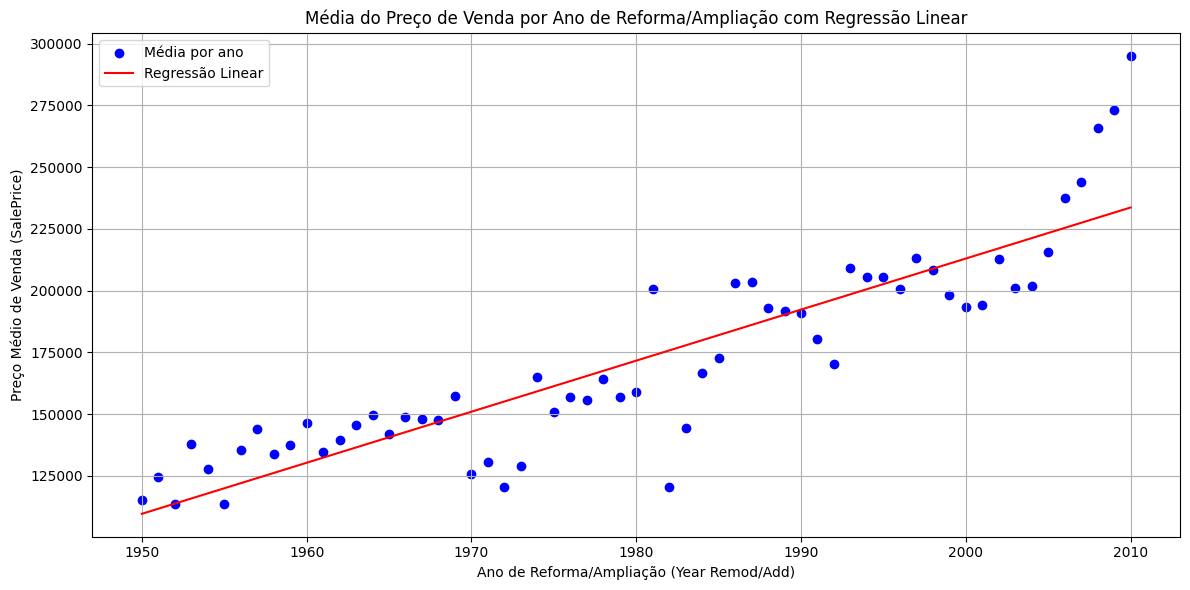

In [4]:
# Agrupar por ano e calcular a média
media_por_ano = df.groupby('Year Remod/Add')['SalePrice'].mean().reset_index()

# Valores para regressão
X3 = media_por_ano['Year Remod/Add'].values.reshape(-1, 1)
y3 = media_por_ano['SalePrice'].values

# Regressão linear
model3 = LinearRegression()
model3.fit(X3, y3)
y_pred3 = model3.predict(X3)

# Plotar pontos e regressão
plt.figure(figsize=(12, 6))
plt.scatter(media_por_ano['Year Remod/Add'], media_por_ano['SalePrice'], color='blue', label='Média por ano')
plt.plot(media_por_ano['Year Remod/Add'], y_pred3, color='red', label='Regressão Linear')
plt.title('Média do Preço de Venda por Ano de Reforma/Ampliação com Regressão Linear')
plt.xlabel('Ano de Reforma/Ampliação (Year Remod/Add)')
plt.ylabel('Preço Médio de Venda (SalePrice)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Análise dos coeficientes encontrados:

Regressão para a variável Área Construída
Intercepto: 13289.63
Coeficiente angular: 111.69


Regressão para a variável Ano de última reforma/ampliação
Intercepto: -3869250.53
Coeficiente angular: 2041.08

O valor do coeficiente angular de cada curva indica o impacto que a variável explicativa tem na determinação do preço de venda(variável dependente). Ou seja, quanto maior a inclinação, mais o preço de venda será impactado por uma eventual variação da variável explicativa.

No caso da área construída, a cada 1 pé quadrado a mais de área construída, o preço de venda aumenta, em média US 111,69. Da mesma forma, para cada ano mais recente de reforma/ampliação, o valor da casa aumenta em média US 2.041,08.

Ao se analisar os coeficientes de determinação:
R² da regressão da variável explicativa ano de última reforma/ampliação: 0.2841
R² da regressão da variável explicativa área construída: 0.4995

Nota-se que a área construída explica aproximadamente 50% do incremento do preço das casas, contra 28% explicados pelo ano de última intervenção civil na edificação.  





## Questão B - Validação dos Pressupostos da Regressão Linear


### 1- Os coeficientes β1 e β2 devem ser lineares.

O gráfico que representa a regressão linear do preço de venda de acordo com a ***área construída*** apresenta visualmente comportamento linear. Por outro lado, a regressão da variável preço médio de venda por ***ano de última reforma*** indica comportamento não linear para os valores finais da variável explicativa, em especial após 2005. Portanto, será considerado que B1 e B2 da segunda variável explicativa não são lineares.

Não sendo lineares, não seria possível prever o preço de venda de uma casa a partir da aplicação de regressão linear na variável  "ano de última reforma".

### 2- O Valor Esperado de ui é zero

In [5]:
# Resíduos (erros)
residuos1 = y1 - y_pred1

residuos2 = y1 - y_pred2

# Soma dos resíduos
soma_residuos1 = residuos1.sum()

soma_residuos2 = residuos2.sum()

print("Soma dos resíduos 1:", soma_residuos1)
print()
print("Soma dos resíduos 2:", soma_residuos2)

Soma dos resíduos 1: -4.237517714500427e-08

Soma dos resíduos 2: -4.4656917452812195e-07


Os resíduos apresentaram valor tendendo a zero, portanto, as variáveis atendem a esse requisito.

### Teste da normalidade dos resíduos



Resíduos 1 - Estatística: 0.9211, p-valor: 0.0000
Resíduos 2 - Estatística: 0.8944, p-valor: 0.0000
Resíduos 1: rejeita-se a normalidade (p < 0.05)
Resíduos 2: rejeita-se a normalidade (p < 0.05)


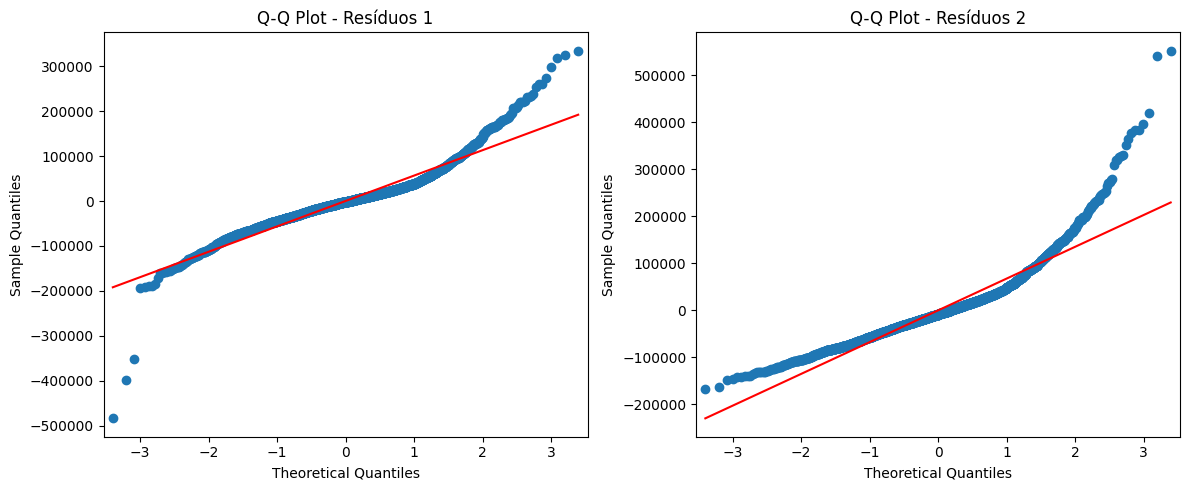

In [10]:
from scipy.stats import shapiro

# Teste de normalidade dos resíduos
stat1, p1 = shapiro(residuos1)
stat2, p2 = shapiro(residuos2)

print(f"Resíduos 1 - Estatística: {stat1:.4f}, p-valor: {p1:.4f}")
print(f"Resíduos 2 - Estatística: {stat2:.4f}, p-valor: {p2:.4f}")

# Interpretação
if p1 < 0.05:
    print("Resíduos 1: rejeita-se a normalidade (p < 0.05)")
else:
    print("Resíduos 1: não se rejeita a normalidade")

if p2 < 0.05:
    print("Resíduos 2: rejeita-se a normalidade (p < 0.05)")
else:
    print("Resíduos 2: não se rejeita a normalidade")


import matplotlib.pyplot as plt
import statsmodels.api as sm

# Q-Q Plot para resíduos 1
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sm.qqplot(residuos1, line='s', ax=plt.gca())
plt.title('Q-Q Plot - Resíduos 1')

# Q-Q Plot para resíduos 2
plt.subplot(1, 2, 2)
sm.qqplot(residuos2, line='s', ax=plt.gca())
plt.title('Q-Q Plot - Resíduos 2')

plt.tight_layout()
plt.show()


A partir da aplicação do teste de Shapiro e da curva QQ-Plot, observa-se que os resíduos não se distribuem conforme uma normal. Portanto não atende a essa premissa.

### 3- Homocedasticidade ou variância igual de ui

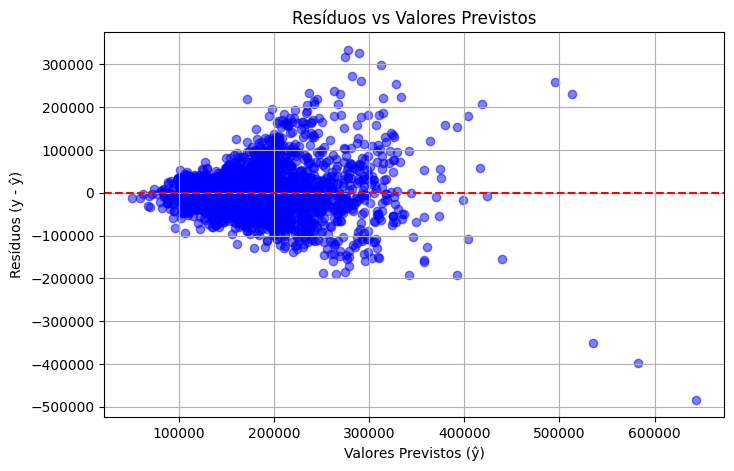

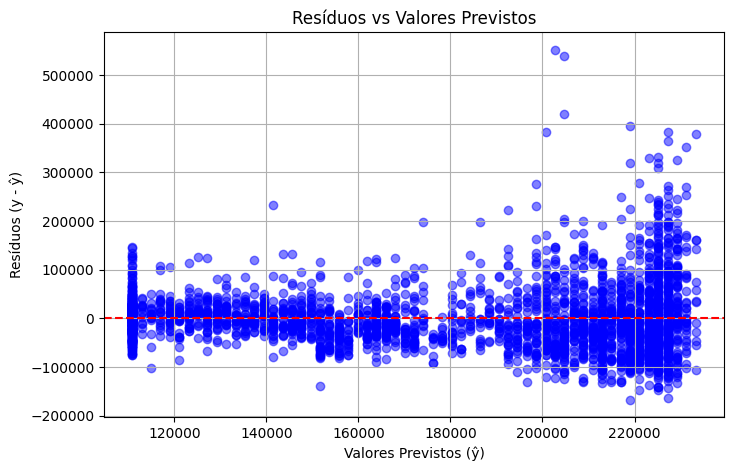

In [6]:
# teste de variância de ui (resíduos)

# INSPEÇÃO VISUAL DOS RESÍDUOS (para testar se variância é constante para todos os níveis da variável explicativa)

# Plotando resíduos vs valores previstos
plt.figure(figsize=(8, 5))
plt.scatter(y_pred1, residuos1, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos (ŷ)')
plt.ylabel('Resíduos (y - ŷ)')
plt.title('Resíduos vs Valores Previstos')
plt.grid(True)
plt.show()



# Plotando resíduos vs valores previstos
plt.figure(figsize=(8, 5))
plt.scatter(y_pred2, residuos2, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos (ŷ)')
plt.ylabel('Resíduos (y - ŷ)')
plt.title('Resíduos vs Valores Previstos')
plt.grid(True)
plt.show()


Inspeção visual indicou variância variável para valores crescentes das duas variáveis explicativas. Portanto, será executado um teste numérico de Breusch-Pagan para confirmar se de fato são ou não constantes os resíduos.

In [7]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# y: variável dependente e X: variável independente(s)

# Adicionando constante à matriz de variáveis independentes
X1m = sm.add_constant(X1)  # necessário para o modelo com intercepto
X2m = sm.add_constant(X2)
# Ajusta o modelo
modelo1 = sm.OLS(y1, X1m).fit()
modelo2 = sm.OLS(y1, X2m).fit()
# Obtém os resíduos
residuos1 = modelo1.resid
residuos2 = modelo2.resid
# Teste de Breusch-Pagan
# A função espera (resíduos, matriz X do modelo original)
teste1 = het_breuschpagan(residuos1, X1m)
teste2 = het_breuschpagan(residuos2, X2m)
# Resultado do teste
labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
resultado1 = dict(zip(labels, teste1))
resultado2 = dict(zip(labels, teste2))
# Mostra os resultados
for k, v in resultado1.items():
    print(f'{k}: {v:.4f}')
for k, v in resultado2.items():
    print(f'{k}: {v:.4f}')

LM Statistic: 592.3920
LM p-value: 0.0000
F-Statistic: 742.0080
F p-value: 0.0000
LM Statistic: 123.9328
LM p-value: 0.0000
F-Statistic: 129.3181
F p-value: 0.0000


Como LM p-value e F p-value obtidos foram praticamente nulos, tem-se a rejeição da hipótese nula, ou seja, em ambos os casos rejeita-se a hipótese nula de homocedasticidade, **recaindo-se em heterocedasticidade**. Ou seja, a variância dos resíduos não é constante em todos os níveis da variável explicativa. Viola-se a premissa básica para aplicação da regressão linear.

Como último passo para decisão, será verificada a multicolinearidade entre as variáveis, dado pelo índice "VIF". Um VIF até 10 indica que das variáveis explicativas estão pouco relcionadas, e pode-se utiliza-se da regressão para previsão e/ou explicação sobre elas.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponha que df seja seu DataFrame com as variáveis
# Se necessário, substitua por seu DataFrame real

Xvif = df[['Year Remod/Add', 'Gr Liv Area']]
Xvif = sm.add_constant(Xvif)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variável'] = Xvif.columns
vif_data['VIF'] = [variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])]

print(vif_data)


         Variável          VIF
0           const  9873.294107
1  Year Remod/Add     1.111601
2     Gr Liv Area     1.111601


Não foi encontrada multicolinearidade, portanto os problemas que impedem a representação do fenômeno por uma regressão linear são:

1. Não normalidade dos resíduos,
2. Heterocedasticidade dos resíduos (variância não constante).
2. Não linearidade dos coeficientes da variável "ano de última reforma".

Por esses motivos, será aplicada uma regressão robusta, em detrimento da regressão linear.